<a href="https://colab.research.google.com/github/Diahdwi/2025_VisiKomputer_TI2C/blob/main/Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 2 - Klasifikasi Gambar

# Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


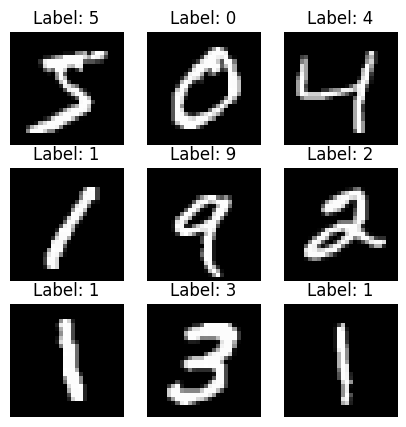

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i], cmap='gray')
 plt.title(f"Label: {y_train[i]}")
 plt.axis('off')
plt.show()


# Tugas Kecil!
# Ganti range(9) dengan range(25) untuk menampilkan lebih banyak  contoh.

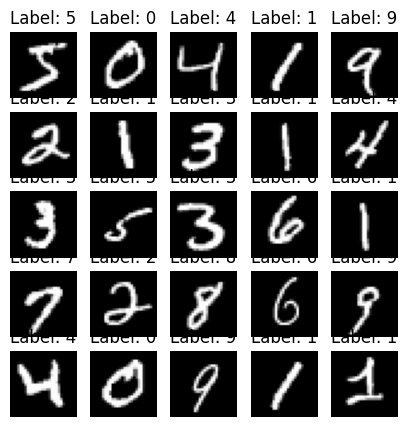

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.imshow(x_train[i], cmap='gray')
 plt.title(f"Label: {y_train[i]}")
 plt.axis('off')
plt.show()

# Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0
# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM  berat
y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9101


# Tugas kecil: Ubah kernel dari linear menjadi rbf. Bagaimana pengaruhnya terhadap  akurasi?

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0
# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM  berat
y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9513


# Praktikum D3 – Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.8892 - loss: 0.3715 - val_accuracy: 0.9798 - val_loss: 0.0749
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9803 - loss: 0.0644 - val_accuracy: 0.9850 - val_loss: 0.0543
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9871 - loss: 0.0414 - val_accuracy: 0.9842 - val_loss: 0.0534
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9919 - loss: 0.0274 - val_accuracy: 0.9855 - val_loss: 0.0523
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9940 - loss: 0.0203 - val_accuracy: 0.9867 - val_loss: 0.0505


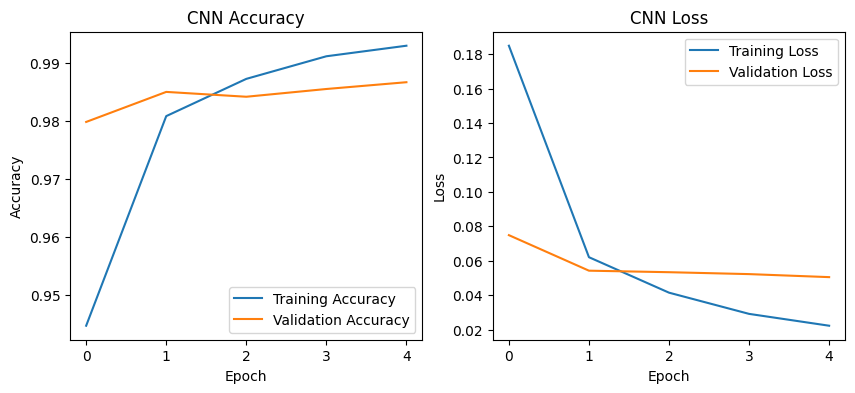

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0
model = models.Sequential([
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tugas kecil: Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya  meningkat?

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9003 - loss: 0.3326 - val_accuracy: 0.9843 - val_loss: 0.0555
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9848 - loss: 0.0502 - val_accuracy: 0.9885 - val_loss: 0.0393
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9887 - loss: 0.0359 - val_accuracy: 0.9887 - val_loss: 0.0427
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9923 - loss: 0.0243 - val_accuracy: 0.9897 - val_loss: 0.0415
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9944 - loss: 0.0187 - val_accuracy: 0.9905 - val_loss: 0.0372


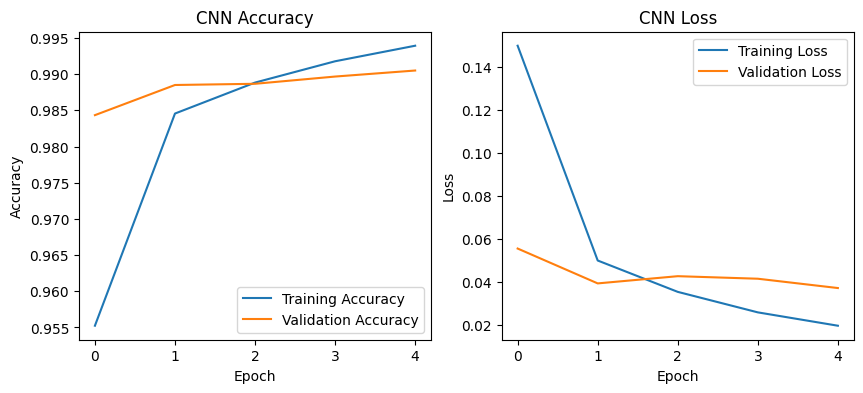

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Normalisasi dan reshape data
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

# Model CNN dengan 2 lapisan Conv2D
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    # Tambahan lapisan Conv2D
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training model
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 64s 44ms/step - accuracy: 0.3523 - loss: 1.7683 - val_accuracy: 0.5268 - val_loss: 1.3184
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.5727 - loss: 1.2099 - val_accuracy: 0.6076 - val_loss: 1.1087
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6277 - loss: 1.0653 - val_accuracy: 0.6528 - val_loss: 1.0267
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.6637 - loss: 0.9675 - val_accuracy: 0.6536 - val_loss: 1.0026
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.6860 - loss: 0.9050 - val_accuracy: 0.6678 - val_loss: 0.9653
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.7068 - loss: 0.8417 - val_accuracy: 0.6870 - val_loss: 0.9414
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7229 - loss: 0.7941 - val_accuracy: 0.6886 - val_loss: 0.9087
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.7349 -

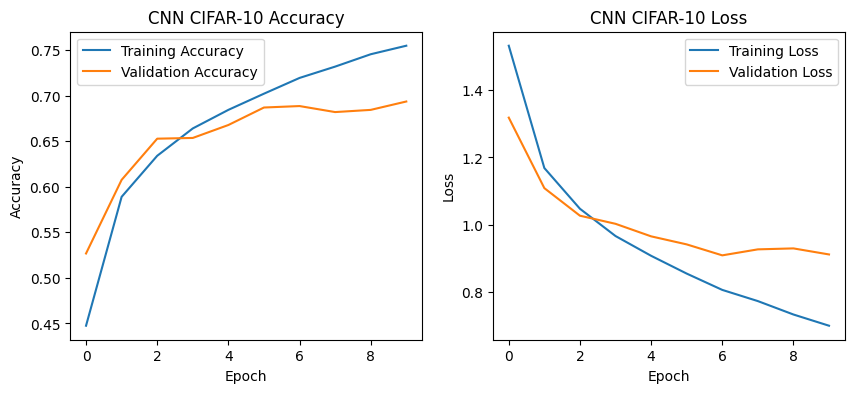

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
model = models.Sequential([
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, (3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tugas kecil: Coba tambahkan Dropout(0.5) sebelum lapisan Dense terakhir. Apa  pengaruhnya pada overfitting?

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 42ms/step - accuracy: 0.2735 - loss: 1.9419 - val_accuracy: 0.5076 - val_loss: 1.3860
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 45ms/step - accuracy: 0.4527 - loss: 1.4973 - val_accuracy: 0.5632 - val_loss: 1.2359
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.5030 - loss: 1.3670 - val_accuracy: 0.6054 - val_loss: 1.1207
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.5399 - loss: 1.2851 - val_accuracy: 0.6284 - val_loss: 1.0709
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.5599 - loss: 1.2301 - val_accuracy: 0.6342 - val_loss: 1.0506
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.5781 - loss: 1.1704 - val_accuracy: 0.6552 - val_loss: 0.9952
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.5991 - loss: 1.1185 - val_accuracy: 0.6738 - val_loss: 0.9403
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6135 -

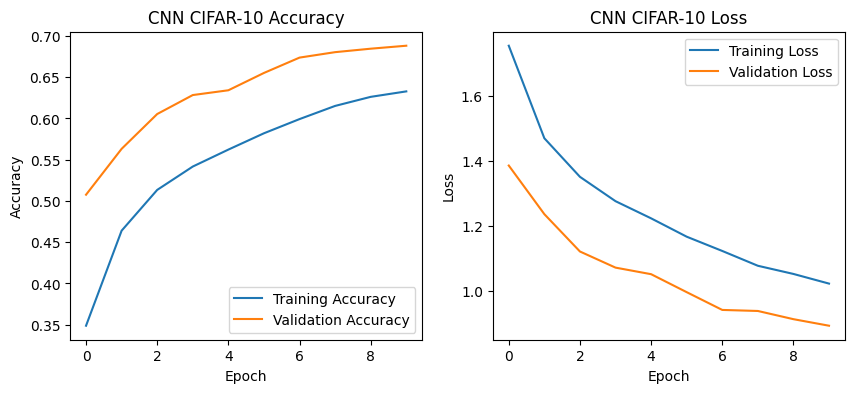

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Model CNN dengan Dropout
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # Tambahan dropout
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Praktikum D5 – Transfer Learning dengan Model Pra-Latih

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 613s 434ms/step - accuracy: 0.4529 - loss: 1.5561 - val_accuracy: 0.5646 - val_loss: 1.2242
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 644s 450ms/step - accuracy: 0.5772 - loss: 1.2086 - val_accuracy: 0.5940 - val_loss: 1.1750
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 683s 450ms/step - accuracy: 0.5967 - loss: 1.1479 - val_accuracy: 0.6080 - val_loss: 1.1368
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 659s 434ms/step - accuracy: 0.6108 - loss: 1.1121 - val_accuracy: 0.6044 - val_loss: 1.1298
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 640s 447ms/step - accuracy: 0.6268 - loss: 1.0651 - val_accuracy: 0.6082 - val_loss: 1.1250


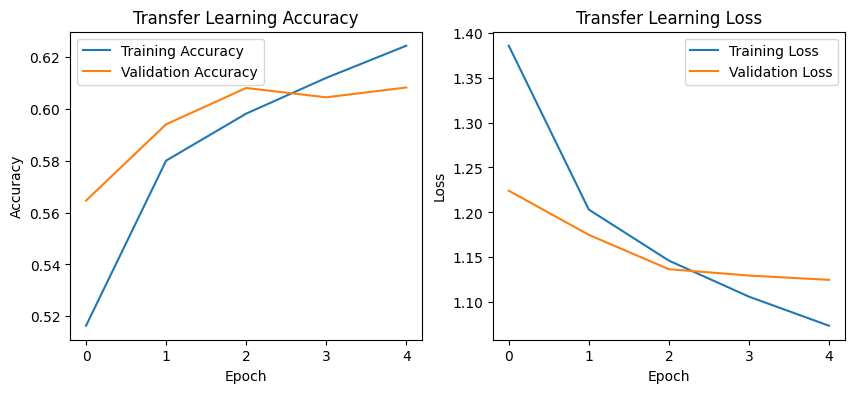

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False,  input_shape=(32,32,3))
base_model.trainable = False
model = models.Sequential([
 base_model,
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tugas kecil: Coba aktifkan 1–2 lapisan terakhir dari base_model (fine-tuning). Bagaimana  akurasinya berubah?

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 652s 462ms/step - accuracy: 0.5079 - loss: 1.4114 - val_accuracy: 0.6114 - val_loss: 1.0939
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 667s 452ms/step - accuracy: 0.6258 - loss: 1.0592 - val_accuracy: 0.6400 - val_loss: 1.0035
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 633s 450ms/step - accuracy: 0.6652 - loss: 0.9598 - val_accuracy: 0.6614 - val_loss: 0.9831
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 684s 451ms/step - accuracy: 0.6758 - loss: 0.9195 - val_accuracy: 0.6682 - val_loss: 0.9728
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 635s 452ms/step - accuracy: 0.6937 - loss: 0.8691 - val_accuracy: 0.6596 - val_loss: 0.9663


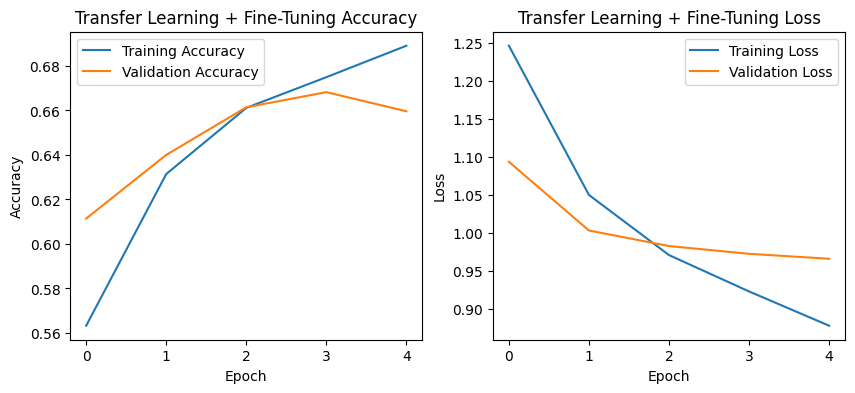

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10 # Import cifar10
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # Load data
x_train, x_test = x_train/255.0, x_test/255.0 # Normalize data

# Load base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Bekukan semua layer dulu
base_model.trainable = False

# Aktifkan 2 lapisan terakhir (fine-tuning)
for layer in base_model.layers[-2:]:
    layer.trainable = True

# Bangun model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning + Fine-Tuning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning + Fine-Tuning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 124s 396ms/step
              precision    recall  f1-score   support

           0       0.71      0.63      0.67      1000
           1       0.66      0.65      0.65      1000
           2       0.57      0.48      0.52      1000
           3       0.41      0.48      0.44      1000
           4       0.56      0.53      0.55      1000
           5       0.59      0.46      0.52      1000
           6       0.64      0.63      0.63      1000
           7       0.69      0.63      0.66      1000
           8       0.64      0.79      0.71      1000
           9       0.56      0.69      0.62      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



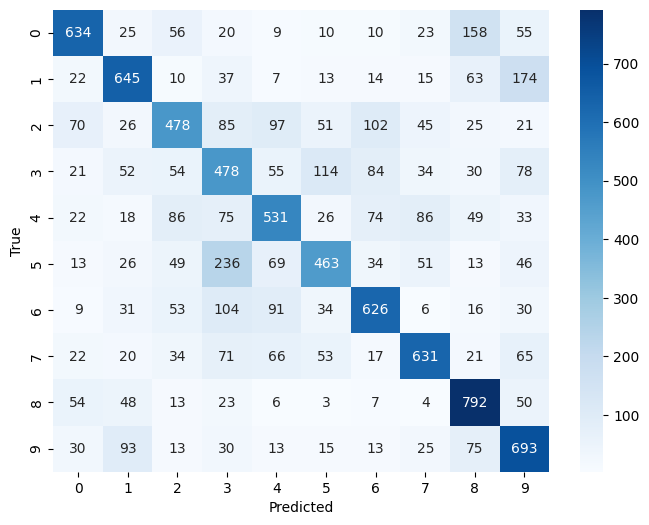

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Tugas kecil: Dari confusion matrix, identifikasi kelas apa yang paling sering salah  diklasifikasikan. Menurut Anda, mengapa hal itu bisa terjadi?

# PENUGASAN : Mencoba klasifikasi tulisan angka:  

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Bangun CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.8727 - loss: 0.4072 - val_accuracy: 0.9856 - val_loss: 0.0464
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9752 - loss: 0.0854 - val_accuracy: 0.9887 - val_loss: 0.0349
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9815 - loss: 0.0614 - val_accuracy: 0.9907 - val_loss: 0.0277
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9852 - loss: 0.0479 - val_accuracy: 0.9916 - val_loss: 0.0274
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 30ms/step - accuracy: 0.9877 - loss: 0.0391 - val_accuracy: 0.9926 - val_loss: 0.0237


In [6]:
from google.colab import files
uploaded = files.upload()


Saving 5.jpg to 5.jpg


In [8]:
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)

    # Invert jika background putih
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Cari bounding box digit
    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20
    img.thumbnail((20,20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28
    canvas = Image.new('L', (28,28), color=0)
    canvas.paste(img, ((28-w)//2, (28-h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]  # (28,28,1)
    return canvas, arr


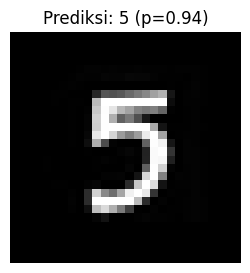

Rekap Prediksi (CNN):
- 5.jpg -> 5 (p=0.938)


In [9]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)
    x_batch = np.expand_dims(x, axis=0)  # (1,28,28,1)

    probs = model.predict(x_batch, verbose=0)[0]
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")


In [10]:
from google.colab import files
uploaded = files.upload()


Saving 8.jpg to 8.jpg


In [11]:
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)

    # Invert jika background putih
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Cari bounding box digit
    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20
    img.thumbnail((20,20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28
    canvas = Image.new('L', (28,28), color=0)
    canvas.paste(img, ((28-w)//2, (28-h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]  # (28,28,1)
    return canvas, arr


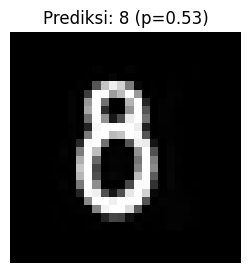

Rekap Prediksi (CNN):
- 8.jpg -> 8 (p=0.531)


In [12]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)
    x_batch = np.expand_dims(x, axis=0)  # (1,28,28,1)

    probs = model.predict(x_batch, verbose=0)[0]
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")


In [13]:
from google.colab import files
uploaded = files.upload()


Saving 9.jpg to 9.jpg


In [14]:
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)

    # Invert jika background putih
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Cari bounding box digit
    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20
    img.thumbnail((20,20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28
    canvas = Image.new('L', (28,28), color=0)
    canvas.paste(img, ((28-w)//2, (28-h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]  # (28,28,1)
    return canvas, arr


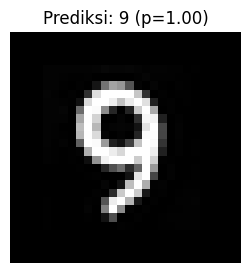

Rekap Prediksi (CNN):
- 9.jpg -> 9 (p=1.000)


In [15]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)
    x_batch = np.expand_dims(x, axis=0)  # (1,28,28,1)

    probs = model.predict(x_batch, verbose=0)[0]
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")
